## **Importing packages**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

sns.set_style("white")
warnings.filterwarnings("ignore")

## **Reading data**

In [2]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [3]:
data = [train_data, test_data]

## **Data analysis**

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_nunique = pd.DataFrame(train_data.dtypes, columns=["dtype"])
df_nunique["nunique"] = train_data.nunique().values
df_nunique

,dtype,nunique
PassengerId,object,8693
HomePlanet,object,3
CryoSleep,object,2
Cabin,object,6560
Destination,object,3
Age,float64,80
VIP,object,2
RoomService,float64,1273
FoodCourt,float64,1507
ShoppingMall,float64,1115


In [42]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


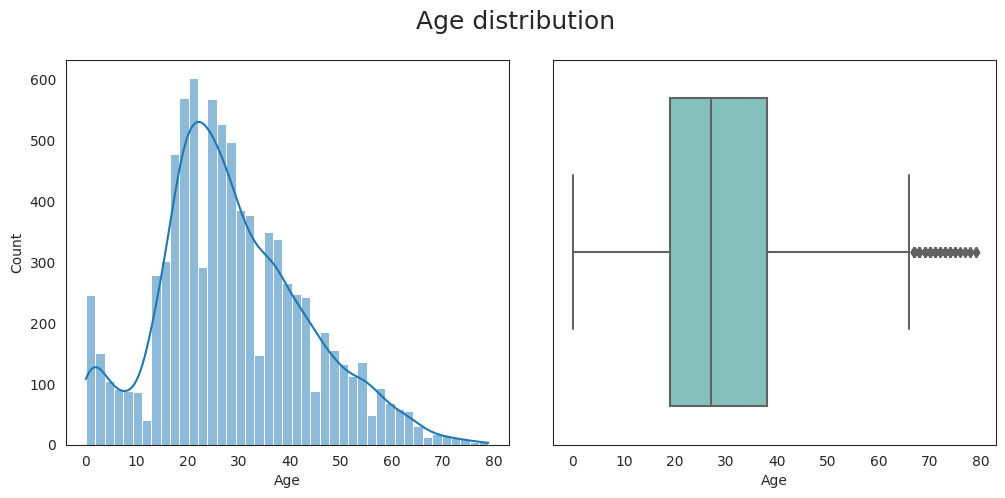

In [42]:
gs = gridspec.GridSpec(1, 2, wspace=0.1)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle("Age distribution", fontsize=18)

# Histogram of age distribution
ax1 = plt.subplot(gs[0, 0])
sns.histplot(x="Age", data=train_data, kde=True)

# Boxplot of age distribution
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(x="Age", data=train_data, palette="GnBu");

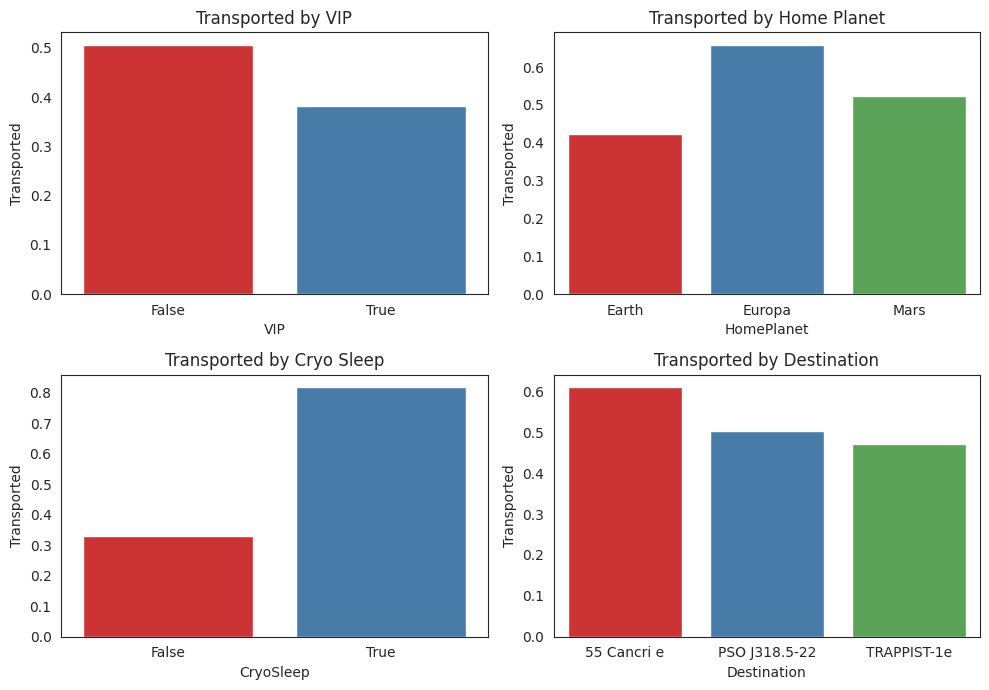

In [25]:
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(10, 7))

# Transported by VIP
ax = plt.subplot(gs[0, 0])
transported_by_vip = train_data.groupby("VIP")["Transported"].mean().reset_index()
sns.barplot(x="VIP", y="Transported", data=transported_by_vip, palette="Set1")
plt.title("Transported by VIP")

# Transported by Home Planet
ax = plt.subplot(gs[0, 1])
transported_by_planet = train_data.groupby("HomePlanet")["Transported"].mean().reset_index()
sns.barplot(x="HomePlanet", y="Transported", data=transported_by_planet, palette="Set1")
plt.title("Transported by Home Planet")

# Transported by Cryo Sleep
ax = plt.subplot(gs[1, 0])
transported_by_cryo = train_data.groupby("CryoSleep")["Transported"].mean().reset_index()
sns.barplot(x="CryoSleep", y="Transported", data=transported_by_cryo, palette="Set1")
plt.title("Transported by Cryo Sleep")

# Transported by Destination
ax = plt.subplot(gs[1, 1])
transported_by_destination = train_data.groupby("Destination")["Transported"].mean().reset_index()
sns.barplot(x="Destination", y="Transported", data=transported_by_destination, palette="Set1")
plt.title("Transported by Destination")

plt.tight_layout()

In [5]:
print(f"Train data shape: {train_data.shape}", 
      f"Test data shape: {test_data.shape}", sep="\n")

Train data shape: (8693, 14)
Test data shape: (4277, 13)


In [6]:
train_na = ((train_data.shape[0] - train_data.dropna(axis=0).shape[0]) / train_data.shape[0]) * 100
test_na = ((test_data.shape[0] - test_data.dropna(axis=0).shape[0]) / test_data.shape[0]) * 100

print(f"Percent of rows with NaN in Train data: {round(train_na, 2)}%", 
      f"Percent of rows with NaN in Test data: {round(test_na, 2)}%", sep="\n")

Percent of rows with NaN in Train data: 24.01%
Percent of rows with NaN in Test data: 23.29%


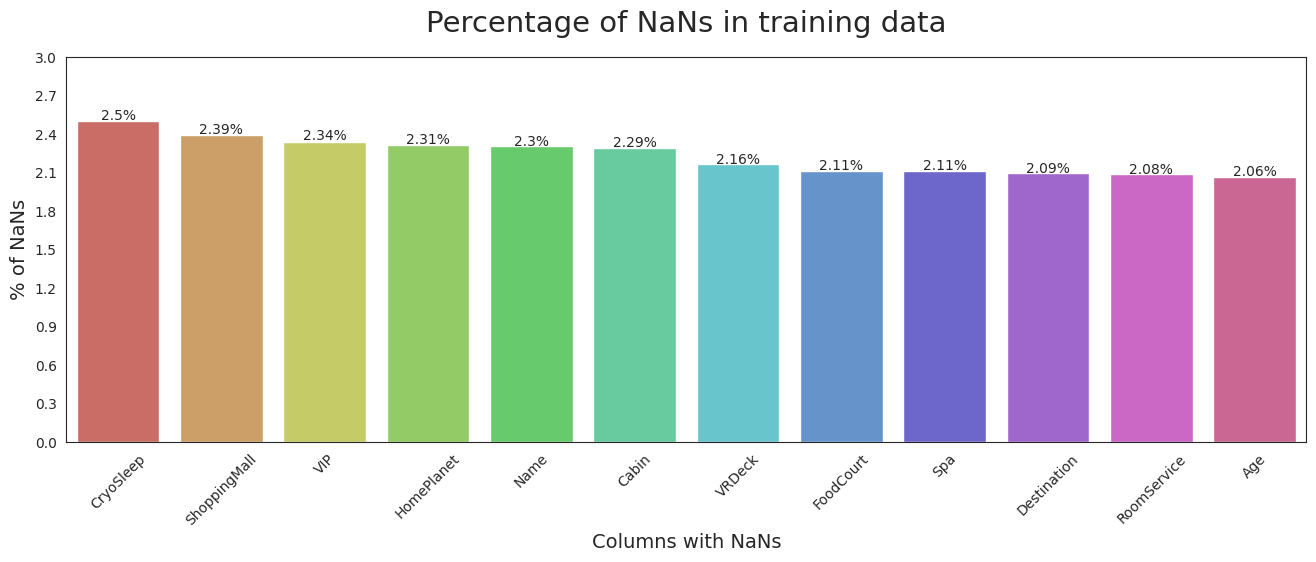

In [7]:
train_na_percent = ((train_data.isna().sum()[train_data.isna().sum() > 0] / train_data.shape[0]) * 100).sort_values(ascending=False)

plt.figure(figsize=(16, 5))
ax = sns.barplot(x=train_na_percent.index, y=train_na_percent.values, palette="hls")
ax.set_title("Percentage of NaNs in training data", fontsize=21, pad=18)
ax.set_ylabel("% of NaNs", fontsize=14)
ax.set_xlabel("Columns with NaNs", fontsize=14)
ax.set_yticks(np.arange(0, 3.3, 0.3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

for p, val in zip(ax.patches, train_na_percent.values.round(2)):
    ax.text(p.get_x() + p.get_width()/2.,
            val + 0.01,
            f'{val}%',
            ha="center") 

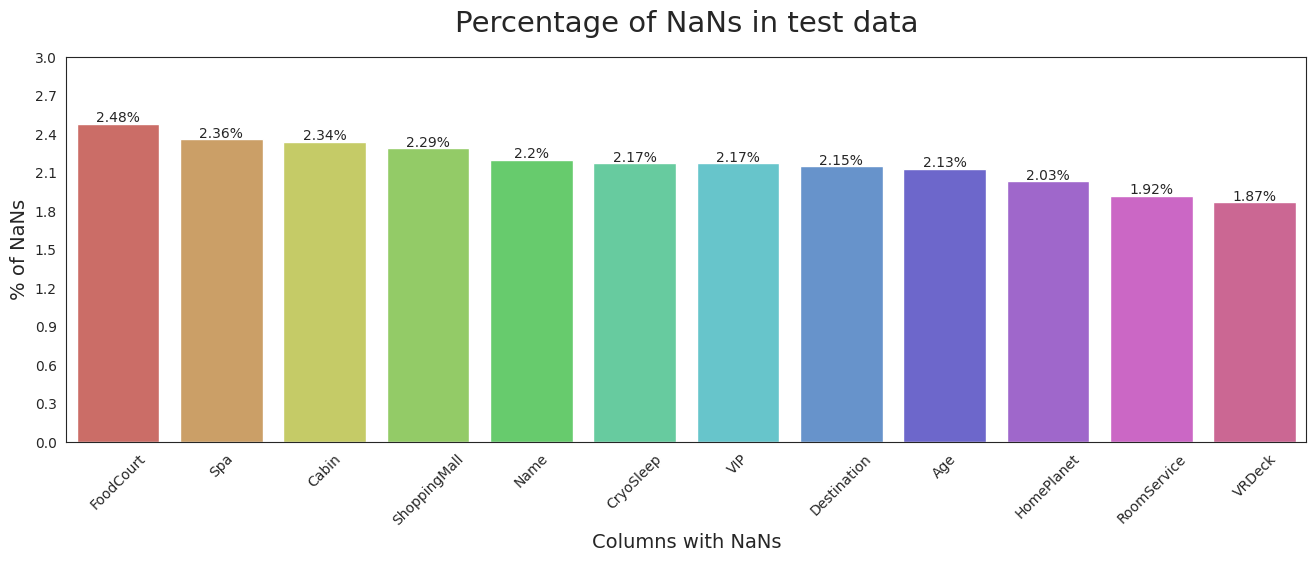

In [8]:
test_na_percent = ((test_data.isna().sum()[test_data.isna().sum() > 0] / test_data.shape[0]) * 100).sort_values(ascending=False)

plt.figure(figsize=(16, 5))
ax = sns.barplot(x=test_na_percent.index, y=test_na_percent.values, palette="hls")
ax.set_title("Percentage of NaNs in test data", fontsize=21, pad=18)
ax.set_ylabel("% of NaNs", fontsize=14)
ax.set_xlabel("Columns with NaNs", fontsize=14)
ax.set_yticks(np.arange(0, 3.3, 0.3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

for p, val in zip(ax.patches, test_na_percent.values.round(2)):
    ax.text(p.get_x() + p.get_width()/2.,
            val + 0.01,
            f'{val}%',
            ha="center") 

## **EDA**

In [20]:
for dataset in data:
    dataset["PassengerGroup"] = [group.split("_")[1].strip("0") for group in dataset["PassengerId"]]